# PROBLEM STATEMENT

•	Build a predictive model for predicting the wine “variety”. Provide the output along with all features to a CSV file.

In [255]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import bokeh as bk
import matplotlib.pyplot as plt

# PRE-PROCESSING AND CLEANING DATA

In [256]:
#Load train data
wine_train_df = pd.read_csv(r"C:\Users\Vishnu Vardhan\Desktop\Knight ML Assignment\Data\train.csv")

In [257]:
#Load test data
wine_test_df = pd.read_csv(r"C:\Users\Vishnu Vardhan\Desktop\Knight ML Assignment\Data\test.csv")

In [258]:
#shape of train data
wine_train_df.shape

(82657, 12)

In [259]:
wine_train_df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [260]:
wine_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [261]:
wine_train_df.dtypes

user_name              object
country                object
review_title           object
review_description     object
designation            object
points                  int64
price                 float64
province               object
region_1               object
region_2               object
winery                 object
variety                object
dtype: object

In [262]:
#Checking for any missing values
wine_train_df.isnull().any()

user_name              True
country                True
review_title          False
review_description    False
designation            True
points                False
price                  True
province               True
region_1               True
region_2               True
winery                False
variety               False
dtype: bool

Below mentioned columns have null values:

1.user_name

2.country

3.designation

4.price

5.province

6.region_1

7.refion_2

In [263]:
#Checking the sum of null values
wine_train_df.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

We can have null values for user_name, province, region_1, region_2, designation. But for price and country name we have to either drop them or try to encorporate some values

Country: We can drop the 35 missing rows as they constitute a very small percentage of the training dataset

In [264]:
#lets look at the rows having null country values
wine_train_df[wine_train_df.country.isnull()]

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
95,@wineschach,NaN,El Capricho 2015 Reserve Cabernet Sauvignon,Dry spicy aromas of dusty plum and tomato add ...,Reserve,89,22.0,NaN,NaN,NaN,El Capricho,Cabernet Sauvignon
184,@worldwineguys,NaN,St. Donat 2013 Márga White,"This Furmint, grown in marl soils, has aromas ...",Márga,88,25.0,NaN,NaN,NaN,St. Donat,White Blend
5501,@worldwineguys,NaN,Orbelus 2011 Getika Made With Organic Grapes Red,"This blend is comprised of 55% Merlot, 21% Cab...",Getika Made With Organic Grapes,88,28.0,NaN,NaN,NaN,Orbelus,Red Blend
6004,@worldwineguys,NaN,Büyülübağ 2012 Shah Red,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Büyülübağ,Red Blend
8231,@worldwineguys,NaN,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Ross-idi,Chardonnay
9037,@paulgwine,NaN,Bachelder 2014 Wismer-Parke Vineyard Pinot Noir,"Scents of clover, stem, green herb and red cur...",Wismer-Parke Vineyard,89,34.0,NaN,NaN,NaN,Bachelder,Pinot Noir
11568,@worldwineguys,NaN,Gotsa Family Wines 2015 Dry Unfiltered Rkatsit...,"Amber to the eye, this wine features an entici...",Dry Unfiltered Rkatsiteli Mtsvane,88,25.0,NaN,NaN,NaN,Gotsa Family Wines,White Blend
14395,@AnneInVino,NaN,Neumeister 2015 Klausen Sauvignon Blanc,Aromatic hints of tomato leaf and pea shoots m...,Klausen,91,38.0,NaN,NaN,NaN,Neumeister,Sauvignon Blanc
14624,@worldwineguys,NaN,Gotsa Family Wines 2015 Dry Unfiltered Rkatsit...,"Amber to the eye, this wine features an entici...",Dry Unfiltered Rkatsiteli Mtsvane,88,25.0,NaN,NaN,NaN,Gotsa Family Wines,White Blend
15896,@JoeCz,NaN,Mt. Beautiful 2014 Pinot Gris,"This is a reasonably rich, concentrated exampl...",NaN,86,19.0,NaN,NaN,NaN,Mt. Beautiful,Pinot Gris


In [265]:
#shape of df before dropping these null values
wine_train_df.shape

(82657, 12)

In [266]:
#dropping these null values
wine_train_df = wine_train_df.dropna(how="any", subset= ["country"] )

In [267]:
#shape after dropping
wine_train_df.shape

(82622, 12)

In [268]:
# Calculate the percentage of remaining records if missing prices are dropped:
total_records = len(wine_train_df)
missing_prices = wine_train_df["price"].isnull().sum()
missing_ratio = 100 - ((missing_prices / total_records) * 100)
print("Missing prices: {}".format(missing_prices)+ "\n" +
      "Total records: {}".format(total_records) + "\n" + 
      "Percentage remaining: {:.2f}%".format(missing_ratio))


Missing prices: 5565
Total records: 82622
Percentage remaining: 93.26%


Since 93.26% means, it retains most of the data despite dropping the missing price rows

In [269]:
# Drop the records with null values for "Price", update the reviews_df dataframe:
wine_train_df = wine_train_df.dropna(how="any", subset=["price"])

In [270]:
wine_train_df.shape

(77057, 12)

# DATA INTERPRETATION

In [271]:
# Number of Countries in the training reviews:
tot_count = wine_train_df["country"].unique()
print("Number of Countries : {}".format(len(tot_count)))


Number of Countries : 38


In [272]:
# Unique countries in reviews:
uniq_count = wine_train_df["country"].unique()
print("unique countries: {}".format(len(uniq_count)))
print(uniq_count)


unique countries: 38
['Australia' 'US' 'Italy' 'France' 'Argentina' 'New Zealand' 'Austria'
 'Chile' 'Portugal' 'Germany' 'Spain' 'England' 'Brazil' 'South Africa'
 'Romania' 'Slovenia' 'Greece' 'Canada' 'Israel' 'Turkey' 'Lebanon'
 'Mexico' 'Uruguay' 'Bulgaria' 'Hungary' 'Moldova' 'Morocco' 'Georgia'
 'Ukraine' 'Croatia' 'Peru' 'Switzerland' 'Luxembourg' 'Cyprus'
 'Czech Republic' 'Macedonia' 'Serbia' 'India']


In [273]:
# Total wine reviews per country (Top 25)
rev_tot_count = wine_train_df["country"].value_counts().head(25)
print("Total no.of reviews by each country: \n")
print(rev_tot_count)


Total no.of reviews by each country: 

US              38406
France          12700
Italy            7919
Chile            2858
Portugal         2814
Spain            2711
Argentina        2537
Austria          1593
Germany          1548
New Zealand      1090
Australia        1006
South Africa      670
Israel            309
Canada            173
Greece            137
Bulgaria           93
Romania            80
England            58
Mexico             38
Slovenia           38
Hungary            35
Moldova            35
Turkey             33
Uruguay            33
Lebanon            28
Name: country, dtype: int64


In [274]:
# The most expensive wine
max_price = wine_train_df['price'].max()
print("The most expensive wine cost ${:.2f}".format(max_price))


The most expensive wine cost $3300.00


In [275]:
# details of max priced wine
wine_train_df[wine_train_df['price'] == 3300]

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
60131,@vossroger,France,Château les Ormes Sorbet 2013 Médoc,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Château les Ormes Sorbet,Bordeaux-style Red Blend


In [276]:
# The cheapest wine cost
min_price = wine_train_df['price'].min()
print("The cheapest wine cost ${:.2f} USD".format(min_price))

The cheapest wine cost $4.00 USD


In [277]:
# details of min priced wine
wine_train_df[wine_train_df['price'] == 4]

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
16408,NaN,US,Bandit NV Chardonnay (California),"Packaged in a cute yellow recyclable Tetrapak,...",NaN,84,4.0,California,California,California Other,Bandit,Chardonnay
21108,@wineschach,Spain,Felix Solis 2012 Flirty Bird White (Vino de la...,"Tropical fruit and citrus aromas aren't bad, b...",Flirty Bird,82,4.0,Central Spain,Vino de la Tierra de Castilla,NaN,Felix Solis,White Blend
28132,NaN,US,Bandit NV Merlot (California),"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Bandit,Merlot
74425,@wineschach,Spain,Terrenal 2010 Cabernet Sauvignon (Yecla),This opens with standard cherry and berry arom...,NaN,84,4.0,Levante,Yecla,NaN,Terrenal,Cabernet Sauvignon
78735,NaN,Romania,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Notes of sun-dried hay and green flower highli...,UnWineD,86,4.0,Viile Timisului,NaN,NaN,Cramele Recas,Pinot Grigio
81044,@gordone_cellars,US,Pam's Cuties NV Unoaked Chardonnay (California),"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,California,California Other,Pam's Cuties,Chardonnay


# DATA VISUALIZATION

First set all the plot sizes and styles

In [278]:
%config InlineBackend.figure_format='retina'
sns.set() 
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")


Plotting the raw data (prices in this case) - Raw data usually does not have any importance interms of visualisation or understanding

Wall time: 28 ms


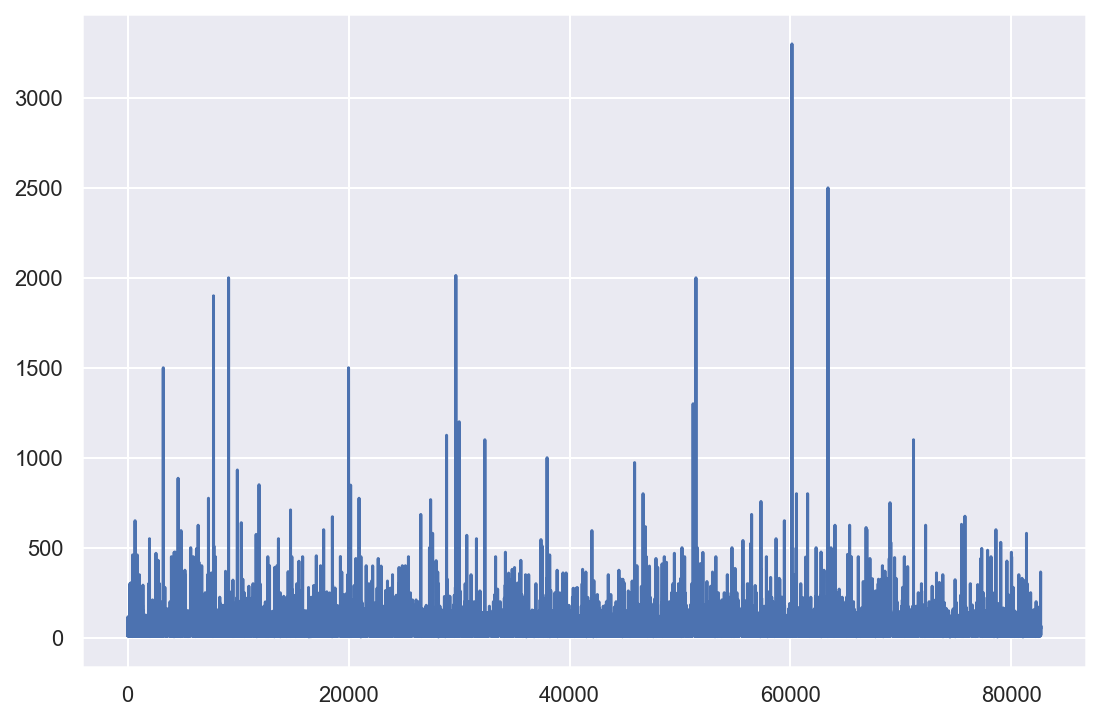

In [279]:
%%time
# Matplotlib to show random order by price
plt.plot(wine_train_df.index, wine_train_df["price"])


Plotting Bar Diagram for Country vs price

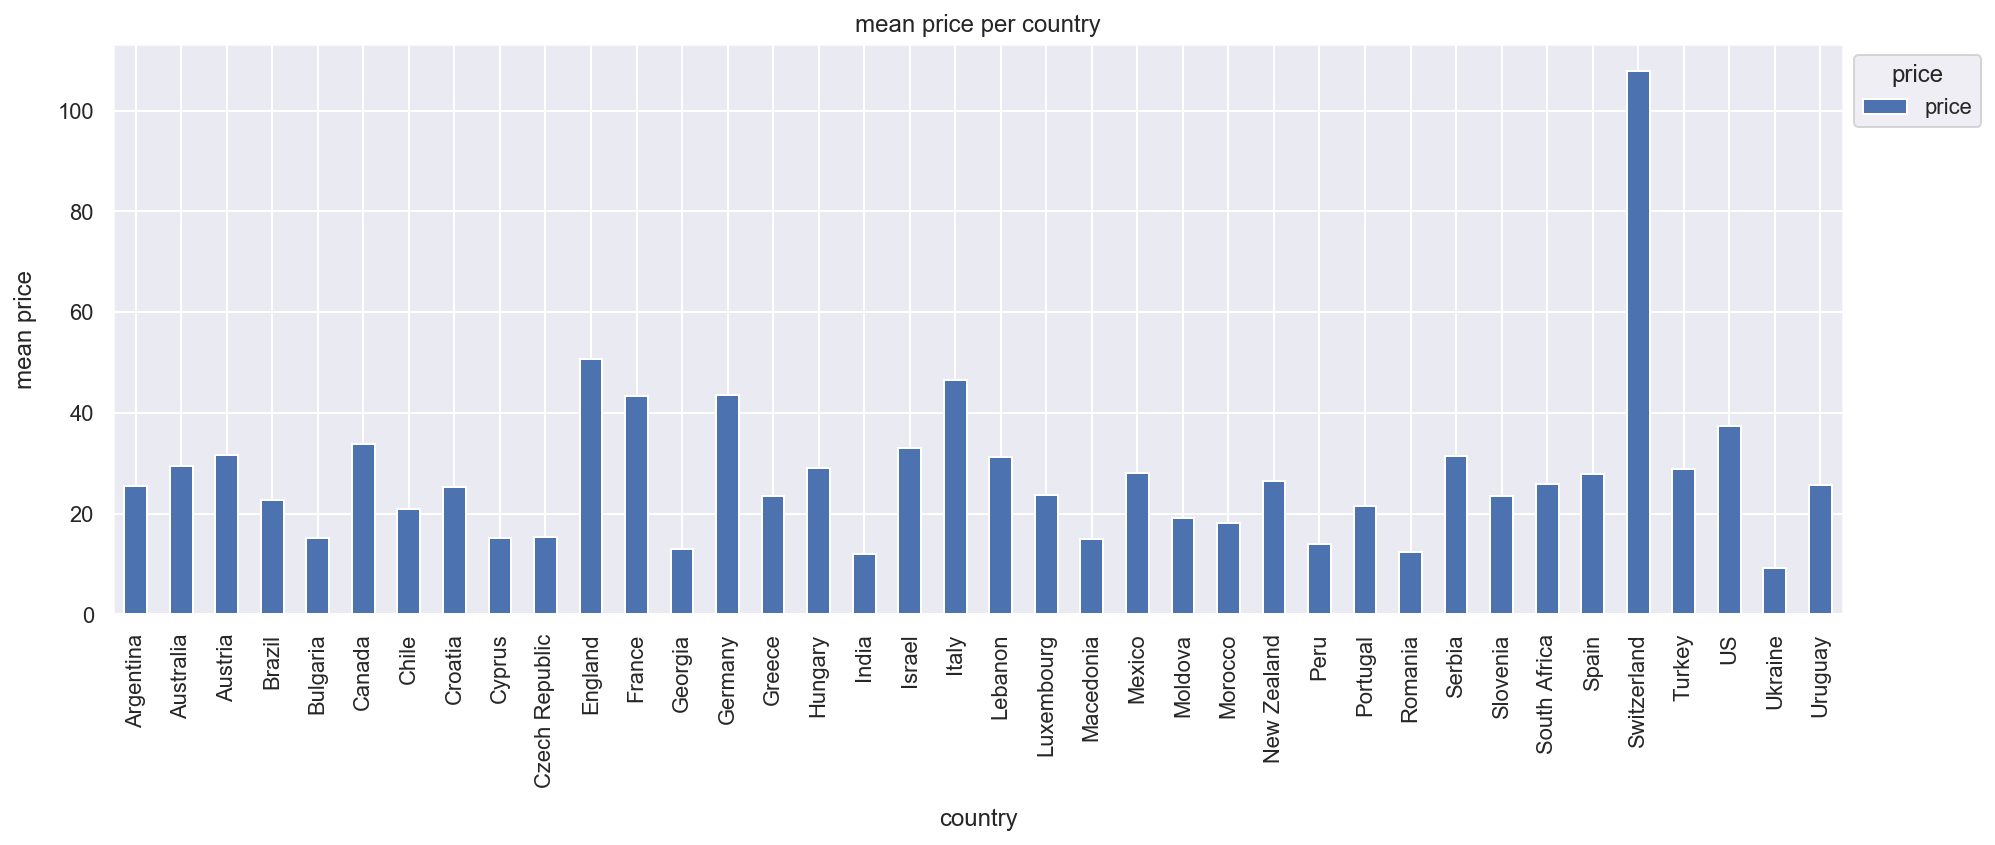

In [280]:
fig, ax = plt.subplots(figsize=(14, 6))

wine_train_df.groupby(wine_train_df['country'])['price'].mean().plot.bar()
mean_price = wine_train_df["price"].mean(0)
wine_train_df["price"].fillna(mean_price)

# Creates labels
ax.set_xlabel('country')
ax.set_ylabel('mean price')
# Sets the plot title
ax.set_title("mean price per country")
ax.legend(bbox_to_anchor=(1, 1), loc=2, title='price')

fig.tight_layout()


The unusual spike seen in the case of Switzerland might be due to some incorrect data and hence can be neglected

Province with most reviews

Wall time: 48.9 ms


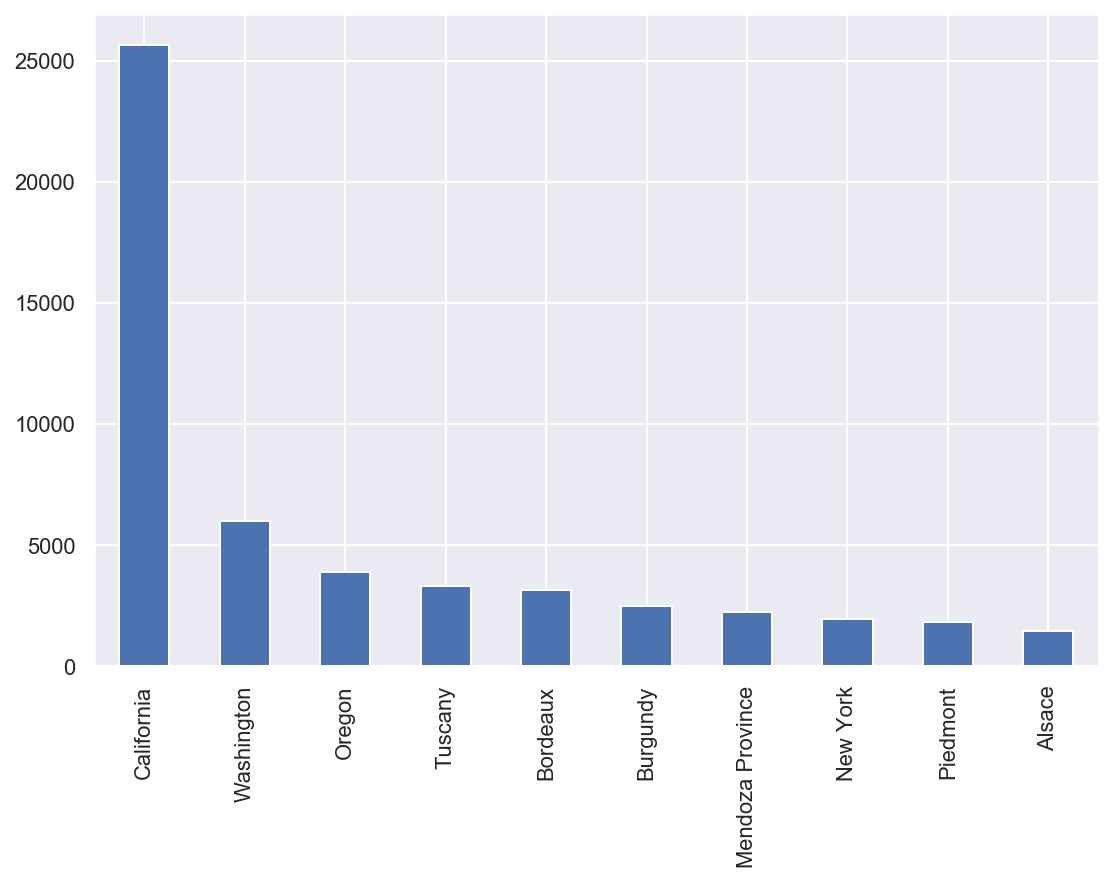

In [281]:
%%time
wine_train_df['province'].value_counts().head(10).plot.bar()


California

In [282]:

top_province = wine_train_df['province'].value_counts().head(1)
print("The province with the most reviews is {}".format(top_province))


The province with the most reviews is California    25634
Name: province, dtype: int64


Bar Plot of points per reviews

Wall time: 57.8 ms


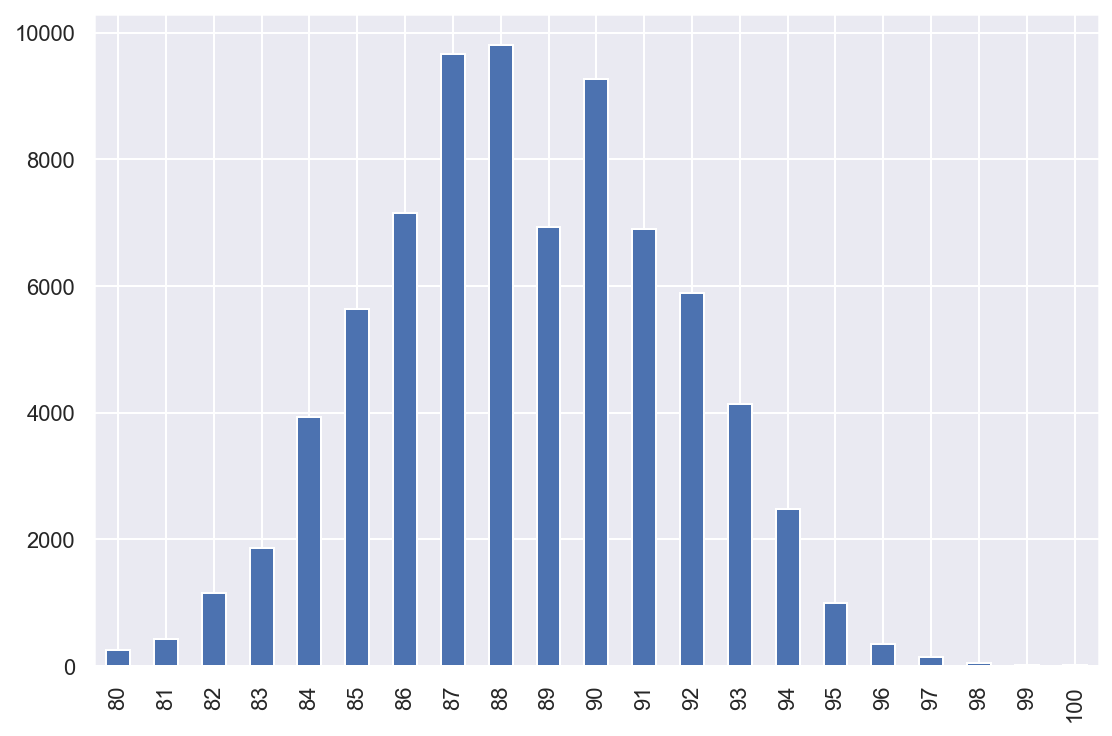

In [283]:
%%time
# Bar plot - points/reviews
wine_train_df['points'].value_counts().sort_index().plot.bar()


Line plot of points per reviews 

Wall time: 338 ms


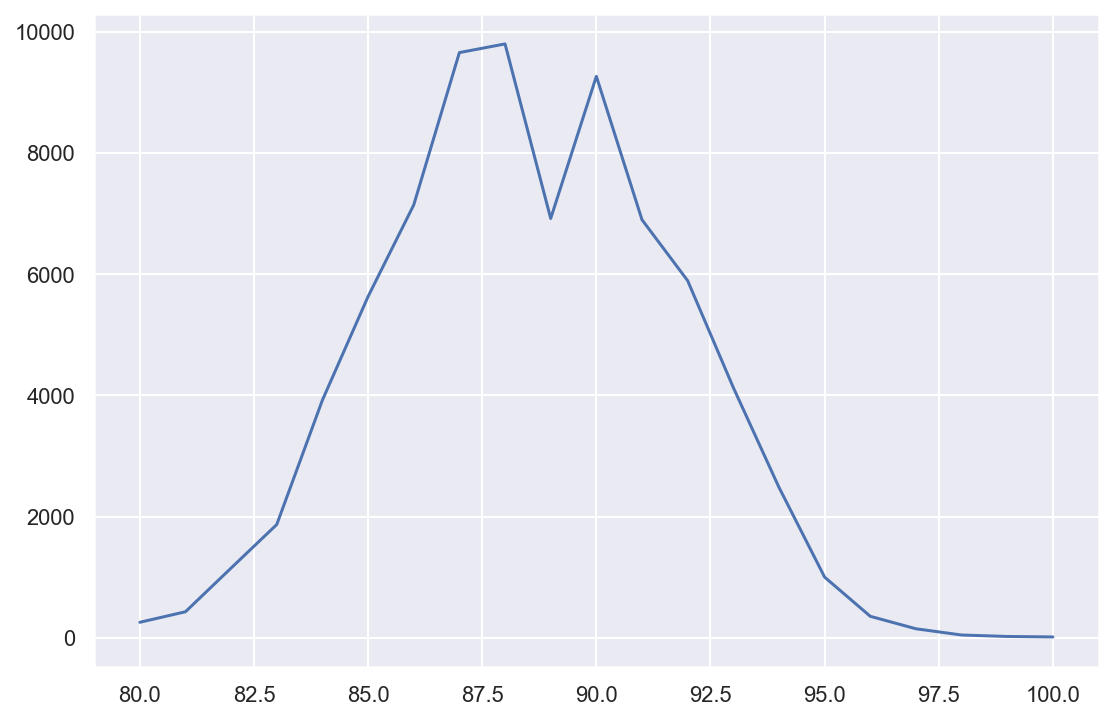

In [284]:
%%time
# Line plot of points/reviews
wine_train_df['points'].value_counts().sort_index().plot.line()


Countplot of points using seaborn

Wall time: 82.8 ms


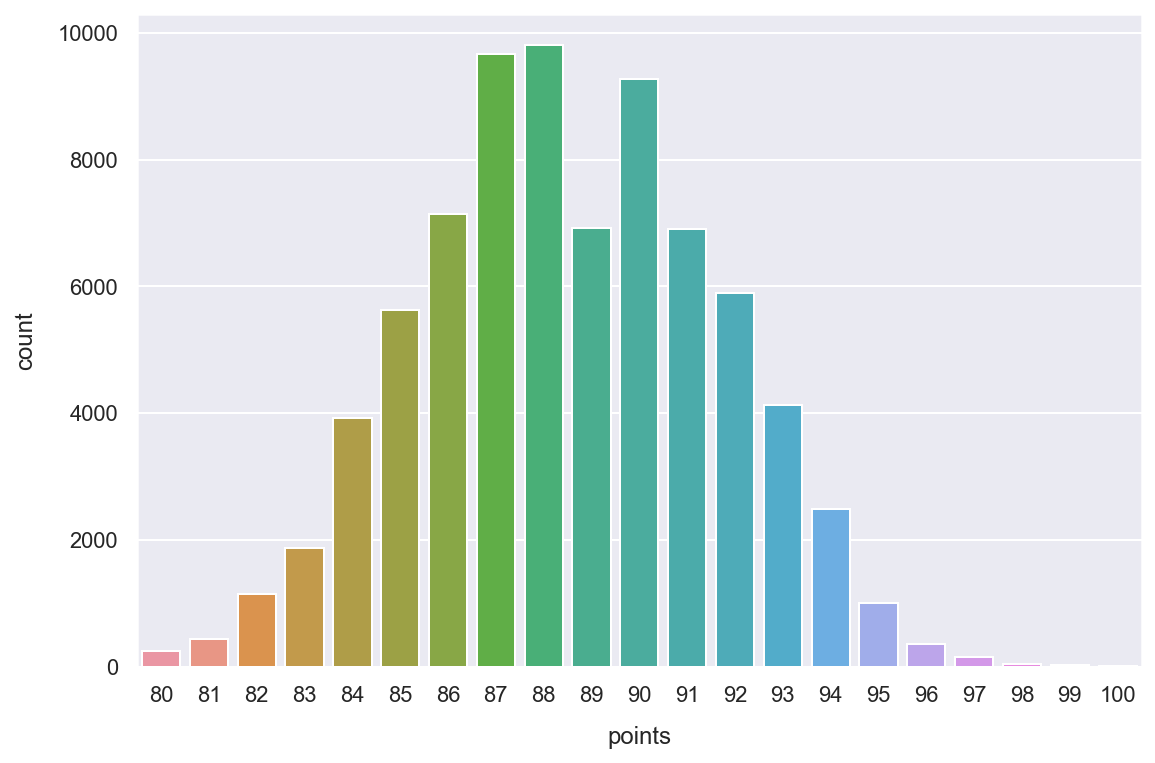

In [285]:
%%time
# Countplot - Distribution of points and how many reviews
sns.countplot(wine_train_df['points'])


KDE plot

Wall time: 690 ms


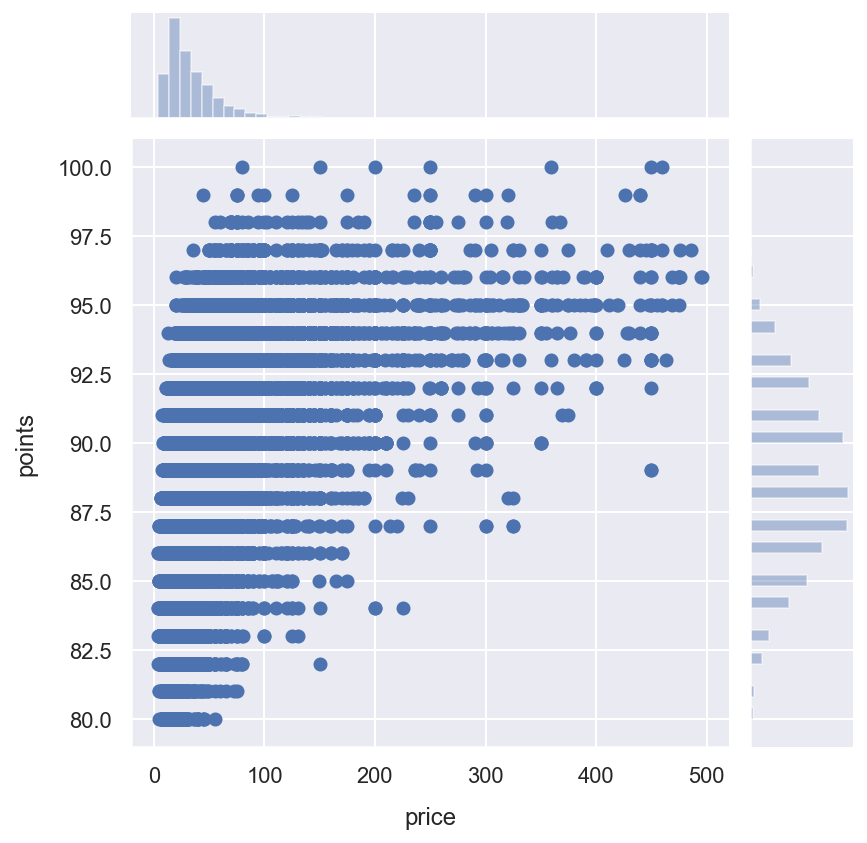

In [286]:
%%time
# Jointplot of price and plot
sns.jointplot(x='price', y='points', data=wine_train_df[wine_train_df['price'] < 500])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Wall time: 3.59 s


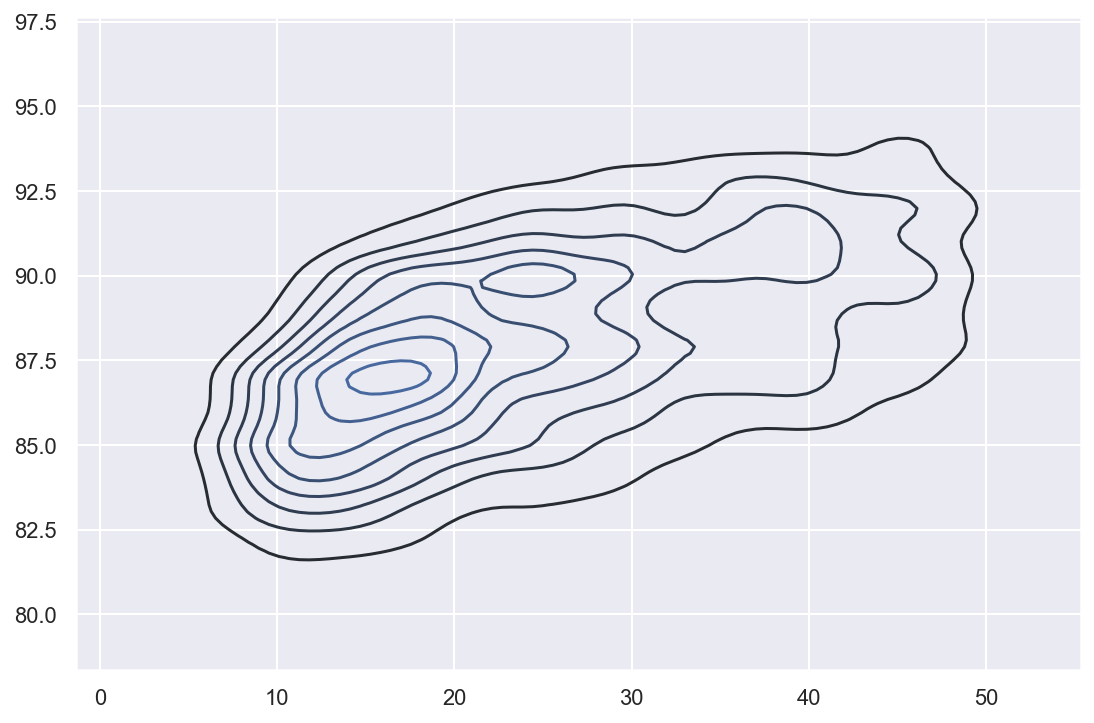

In [287]:
%%time
# Plotted price and point value KDE Chart
sns.kdeplot(wine_train_df[wine_train_df['price'] < 50].loc[:, ['price', 'points']].dropna().sample(5000))

From the density of point and pricing and how they interact, it appears that the wines in the 10.00 - 20.00 range have the highest concentration of consistent points, wines in the 10.00 - 20.00 range have frequently better ratings when compared to more expensive wines.

The reason could be that most people save expensive wine for occassions and use cheap wine more frequently.

It makes sense for the wine producers to focus on the market demand for their products and target their resources towards the taste of the public.



Wall time: 540 ms


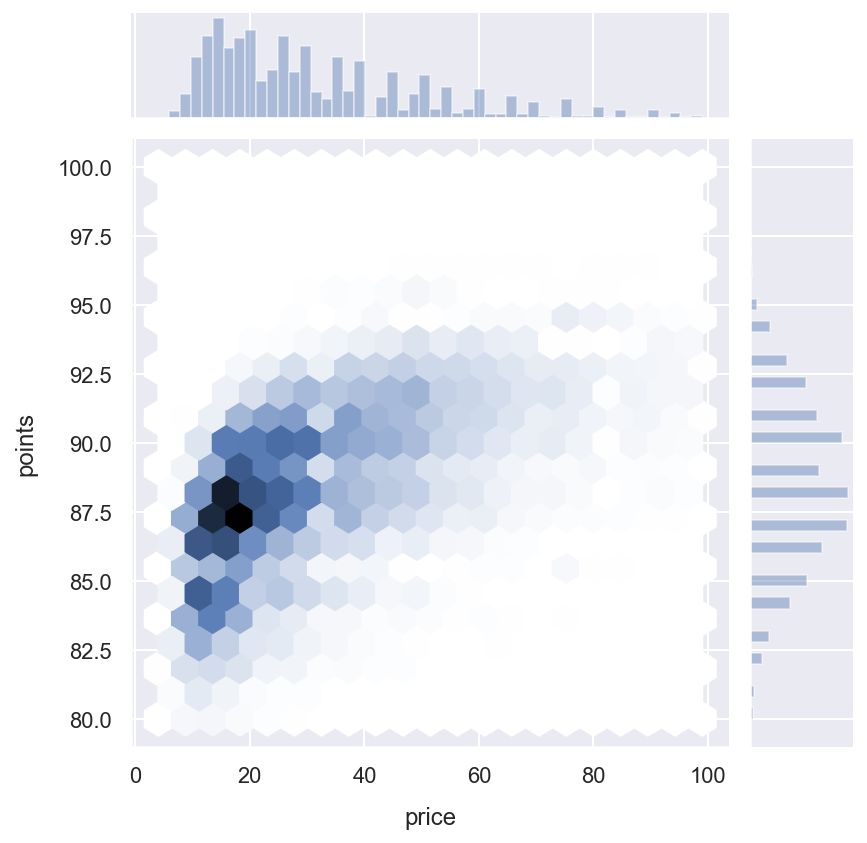

In [288]:
%%time
# Hex grid
sns.jointplot(x='price', y='points', data= wine_train_df[wine_train_df['price'] < 100], kind='hex', 
              gridsize=20)


# PREDICTION MODEL 

In [289]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
sw = stopwords.words('english')


We use the review description to extract key words (by using Natural Language Processing Libraries) and predict the wine variety

Extracting 'review_description' column as input to neural network and 'variety' as output 

In [290]:
input_data = wine_train_df['review_description']
output_data = wine_train_df['variety']

Similarly in the case of test data

In [291]:
input_data_test = wine_test_df['review_description']

Calculating the number of target variables

In [292]:
print ('There are %d varieties of wines in this dataset' % len(set(output_data)))


There are 28 varieties of wines in this dataset


In [293]:
#Normalizing the 28 varieties using labelencoder
labelEncoder = LabelEncoder()
output_data = labelEncoder.fit_transform(output_data)
output_data


array([ 5, 17, 11, ...,  6,  0,  3])

In [294]:
#converting text into lower case (both test and training data)
input_data = input_data.str.lower()
input_data_test = input_data_test.str.lower()

In [295]:
list_aux = []
for phase_word in input_data:
    list_aux.append(' '.join([re.sub('[0-9\W_]', '', word) for word in phase_word.split() if not word in sw]))
input_data = list_aux

In [296]:
list_aux_test = []
for phase_word in input_data_test:
    list_aux_test.append(' '.join([re.sub('[0-9\W_]', '', word) for word in phase_word.split() if not word in sw]))
input_data_test = list_aux_test

In [297]:
#Converting text into vectors
countVectorizer = CountVectorizer(stop_words=sw)
input_data = countVectorizer.fit_transform(input_data)
input_data_test = countVectorizer.transform(input_data_test)

In [298]:
input_data.shape

(77057, 34240)

In [299]:
input_data_test.shape

(20665, 34240)

Train the neural network with train data, using adam's optomizer 

In [300]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=len(countVectorizer.get_feature_names())))
model.add(Dense(units=output_data.max()+1, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(input_data, output_data, epochs=2, verbose=1)

Epoch 1/2
77057/77057 [==============================] - 236s 3ms/step - loss: 1.1807 - accuracy: 0.6539
Epoch 2/2
77057/77057 [==============================] - 237s 3ms/step - loss: 0.6365 - accuracy: 0.8029


In [301]:
y_pred = model.predict(input_data_test, verbose=1)
y_pred

20665/20665 [==============================] - 12s 591us/step


array([[2.12830212e-03, 3.75184982e-06, 1.69424172e-02, ...,
        3.35454894e-03, 4.20013603e-05, 3.45141590e-02],
       [6.27183181e-05, 8.05226094e-11, 3.43156498e-05, ...,
        7.02542858e-03, 3.20591731e-09, 4.11158908e-06],
       [1.30284798e-06, 2.52580532e-04, 3.02708522e-05, ...,
        1.15619616e-04, 1.13754934e-02, 3.70060707e-06],
       ...,
       [5.82024595e-03, 1.30603358e-11, 2.14076298e-03, ...,
        9.30610331e-05, 1.08274188e-11, 6.91714667e-05],
       [1.46622388e-02, 3.01330863e-03, 1.34256417e-02, ...,
        2.96266019e-01, 4.18995740e-03, 1.32656598e-03],
       [1.72569975e-02, 1.28098128e-08, 2.09942162e-02, ...,
        2.01404764e-05, 3.23727156e-09, 3.43222709e-05]], dtype=float32)

In [302]:
y_pred.shape

(20665, 28)

In [303]:
y_pred[20000]

array([1.1603971e-04, 6.1668075e-09, 2.8539571e-06, 1.5685908e-06,
       3.9897284e-07, 5.8883161e-09, 9.6717816e-09, 1.4020631e-11,
       5.2505214e-12, 1.1538163e-05, 1.3245227e-03, 2.7662145e-07,
       6.8880661e-09, 9.4359069e-12, 3.1179613e-07, 2.4039446e-06,
       3.2491092e-09, 9.7876966e-01, 1.4518173e-05, 7.0376023e-12,
       8.6517821e-07, 2.1249089e-05, 1.5864329e-10, 2.0565842e-05,
       3.2672167e-06, 1.9577306e-02, 1.3258938e-04, 1.3568879e-07],
      dtype=float32)

In [304]:
#Converting the above output into a sparse matrix by putting a threshold limit value
y_pred= (y_pred>0.3).astype(int)


In [305]:
#Retrieving classes back from sparse matrix
pred = np.zeros((20665,1)).astype(int)
for i in range(20665):
    for j in range(28):
        if y_pred[i][j]==1:
            pred[i]=j

In [306]:
pred.shape

(20665, 1)

In [307]:
pred.reshape((20665,))

array([14,  9,  5, ...,  3,  9,  3])

In [308]:
#Retrieving the names of wine from the numerically encoded vector
pred = labelEncoder.inverse_transform(pred)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [309]:
pred

array(['Pinot Noir', 'Malbec', 'Chardonnay', ..., 'Cabernet Sauvignon',
       'Malbec', 'Cabernet Sauvignon'], dtype=object)

In [310]:
#Adding the predicted 'variety' column to the test dataset
wine_test_df['variety']=pred

In [311]:
wine_test_df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Pinot Noir
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,Malbec
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime,Chardonnay
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,Red Blend
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole,Sangiovese


In [312]:
#Extracting the result csv file
wine_test_df.to_csv(r'C:\Users\Vishnu Vardhan\Desktop\Knight ML Assignment\Data\result.csv', index ='False')

# CONCLUSION

Part-1:

DATA PRE-PROCESSING AND VISUALIZATION: 
 1. Given datasets are closely observed and the missing values are cleaned.
 2. Data is visualized using matplotlib and seaborn libraries.
 3. Following observations are made by interpreting the visualization of data:
     - California was the most reviewed province
     - Most expensive wine is Bordeaux-style Red Blend with USD 3300
     - Cheapest wines are available at USD 4
     - Wines in the 10.00 - 20.00 range have frequently better ratings.The reason could be that most people save expensive wine        for occasions and use cheap wine more frequently. Wine Sellers can focus on this range to increase their profits.
     - There is no correlation between price and points(quality) in most cases.


Part -2:

MODEL TRAINING AND PREDICTION:
 1. The variety of wine is predicted based on the 'review_description' feature.
 2. Using NLTK library the text is vectorized.
 3. This vectorized text is fed as an input to the neural network and output is the multi-class 'variety' of wine (using label     encoding). 
 4. The neural network used is 100 layers dense, has relu activation function for input, hidden layers and Softmax activation       for output layer. It uses Adam's optimizer.
 5. The model shows an accuracy of 80.2 % on training set.
 6. The predicted values of test data are fed into a csv file along with all other features.